# Preparation

In [1]:
import numpy as np
import matplotlib.pyplot as pp
import seaborn

In [2]:
%matplotlib inline

# Download weather data file from website directly

In [4]:
import urllib.request
urllib.request.urlretrieve('ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt','stations.txt')

('stations.txt', <email.message.Message at 0x1ac1914b048>)

In [5]:
open('stations.txt','r').readlines()[:10]

['ACW00011604  17.1167  -61.7833   10.1    ST JOHNS COOLIDGE FLD                       \n',
 'ACW00011647  17.1333  -61.7833   19.2    ST JOHNS                                    \n',
 'AE000041196  25.3330   55.5170   34.0    SHARJAH INTER. AIRP            GSN     41196\n',
 'AEM00041194  25.2550   55.3640   10.4    DUBAI INTL                             41194\n',
 'AEM00041217  24.4330   54.6510   26.8    ABU DHABI INTL                         41217\n',
 'AEM00041218  24.2620   55.6090  264.9    AL AIN INTL                            41218\n',
 'AF000040930  35.3170   69.0170 3366.0    NORTH-SALANG                   GSN     40930\n',
 'AFM00040938  34.2100   62.2280  977.2    HERAT                                  40938\n',
 'AFM00040948  34.5660   69.2120 1791.3    KABUL INTL                             40948\n',
 'AFM00040990  31.5000   65.8500 1010.0    KANDAHAR AIRPORT                       40990\n']

# Select observations

We only want data lines with "GSN" and want to ignore the rest, so here we parse the lines

In [7]:
stations = {} #assign a dictionary for station information

for line in open('stations.txt','r'): #each line can be entered into a loop as string in txt file
    if "GSN" in line:  
        fields = line.split() #split by whitespace by default, split() will parse a string into an array
        
        stations[fields[0]] = ' '.join(fields[4:]) #first item as the key of the station, 5th and after as name (join together)

In [18]:
print(len(stations))

994


Define a function to search names of a station

In [20]:
def findstation(s):
    found = {code:name for code, name in stations.items() if s in name}
    print(found)
    
findstation('SHA')
findstation('NORTH-')

{'AE000041196': 'SHARJAH INTER. AIRP GSN 41196', 'AYM00089050': 'BELLINGSHAUSEN AWS GSN 89050', 'AYM00089573': 'ZHONGSHAN GSN 89573', 'CHM00058362': 'SHANGHAI GSN 58362', 'CHM00059316': 'SHANTOU GSN 59316', 'DAM00006011': 'TORSHAVN GSN 06011', 'GL000004320': 'DANMARKSHAVN GSN 04320', 'IR000407660': 'KERMANSHAH GSN 40766', 'RSM00028552': 'SHADRINSK GSN 28552', 'SFM00068592': 'KING SHAKA INTL AIRPORT GSN 68592'}
{'AF000040930': 'NORTH-SALANG GSN 40930'}


We store only 4 stations for the analysis following the course

In [21]:
findstation('LIHUE')
findstation('SAN DIEGO')
findstation('MINNEAPOLIS')
findstation('IRKUTSK')

{'USW00022536': 'HI LIHUE WSO AP 1020.1 GSN 91165'}
{'USW00023188': 'CA SAN DIEGO LINDBERGH FLD GSN 72290'}
{'USW00014922': 'MN MINNEAPOLIS/ST PAUL AP GSN HCN 72658'}
{'RSM00030710': 'IRKUTSK GSN 30710'}


In [22]:
datastations = ['USW00022536','USW00023188', 'USW00014922','RSM00030710']

# Load data from txt into Numpy array

The complete datafiles for the 4 stations selected have been downloaded as codename.dly and saved in the same folder. What we are doing now is to convert the uninspiring format of .dly format into Numpy array.

In [26]:
open('USW00022536.dly','r').readlines()[:5]

['USW00022536195002TMAX  256  0  256  0  256  0  267  0  217  0  228  0  256  0  272  0  256  0  256  0  256  0  244  0  256  0  256  0  244  0  244  0  250  0  256  0  239  0  250  0  256  0  256  0  267  0  261  0  267  0  267  0  261  0  261  0-9999   -9999   -9999   \n',
 'USW00022536195002TMIN  178  0  156  0  161  0  167  0  167  0  167  0  189  0  211  0  206  0  217  0  217  0  211  0  200  0  200  0  206  0  183  0  206  0  206  0  206  0  194  0  206  0  200  0  206  0  200  0  211  0  183  0  172  0  200  0-9999   -9999   -9999   \n',
 'USW00022536195002PRCP    0  0    0  0    0  0    0  0  737  0  406  0   36  0   38  0    0T 0    0T 0    0  0    0T 0   18  0    5  0   10  0   18  0   15  0    5  0    0T 0    0T 0   23  0   10  0    3  0   48  0    0T 0    0T 0    0T 0    5  0-9999   -9999   -9999   \n',
 'USW00022536195002SNOW    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0

In [28]:
open('readme.txt','r').readlines()[98:121]

['------------------------------\n',
 'Variable   Columns   Type\n',
 '------------------------------\n',
 'ID            1-11   Character\n',
 'YEAR         12-15   Integer\n',
 'MONTH        16-17   Integer\n',
 'ELEMENT      18-21   Character\n',
 'VALUE1       22-26   Integer\n',
 'MFLAG1       27-27   Character\n',
 'QFLAG1       28-28   Character\n',
 'SFLAG1       29-29   Character\n',
 'VALUE2       30-34   Integer\n',
 'MFLAG2       35-35   Character\n',
 'QFLAG2       36-36   Character\n',
 'SFLAG2       37-37   Character\n',
 '  .           .          .\n',
 '  .           .          .\n',
 '  .           .          .\n',
 'VALUE31    262-266   Integer\n',
 'MFLAG31    267-267   Character\n',
 'QFLAG31    268-268   Character\n',
 'SFLAG31    269-269   Character\n',
 '------------------------------\n']

Use numpy genfromtxt to load data into numpy array

In [39]:
def parsefile(filename):
    return np.genfromtxt(filename,
                         delimiter = dly_delimiter,
                         usecols = dly_usecols,
                         dtype = dly_dtype,
                         names = dly_names)

In [40]:
dly_delimiter = [11,4,2,4] + [5,1,1,1]*31 
  #from description of readme.txt, see the number of columns according with variable
    
dly_usecols = [1,2,3] + [4*i for i in range(1,32)] 
  #indicate columns we will use, so only (col 0 for ID is skipped) year, month, element and Value(n), each value represent a day
    
dly_dtype = [np.int32, np.int32, (np.str_,4)] + [np.int32] * 31

dly_names = ['year','month','obs'] + [str(day) for day in range(1, 31+1)] 
  #labels of columns used

In [41]:
lihue = parsefile('USW00022536.dly')
lihue

array([(1950, 2, 'TMAX',   256,   256,   256,   267,   217,   228,   256,   272,   256,   256,   256,   244,   256,   256,   244,   244,   250,   256,   239,   250,   256,   256,   267,   261,   267,   267,   261,   261, -9999, -9999, -9999),
       (1950, 2, 'TMIN',   178,   156,   161,   167,   167,   167,   189,   211,   206,   217,   217,   211,   200,   200,   206,   183,   206,   206,   206,   194,   206,   200,   206,   200,   211,   183,   172,   200, -9999, -9999, -9999),
       (1950, 2, 'PRCP',     0,     0,     0,     0,   737,   406,    36,    38,     0,     0,     0,     0,    18,     5,    10,    18,    15,     5,     0,     0,    23,    10,     3,    48,     0,     0,     0,     5, -9999, -9999, -9999),
       ...,
       (2015, 9, 'WT03', -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999,     1, -9999,     1, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999),
       (2015, 9,

We organize this into a better numpy format

In [62]:
def unroll(record):
    startdate = np.datetime64('{}-{:02}'.format(record['year'],record['month']))
    dates = np.arange(startdate, startdate + np.timedelta64(1,'M'), np.timedelta64(1,'D'))
    
    rows = [(date,record[str(i+1)]/10) for i, date in enumerate(dates)] #enumerate() will assign an index for each observation
    return np.array(rows,dtype=[('date','M8[D]'),('value','d')])

In [63]:
unroll(lihue[0])

array([('1950-02-01', 25.6), ('1950-02-02', 25.6), ('1950-02-03', 25.6),
       ('1950-02-04', 26.7), ('1950-02-05', 21.7), ('1950-02-06', 22.8),
       ('1950-02-07', 25.6), ('1950-02-08', 27.2), ('1950-02-09', 25.6),
       ('1950-02-10', 25.6), ('1950-02-11', 25.6), ('1950-02-12', 24.4),
       ('1950-02-13', 25.6), ('1950-02-14', 25.6), ('1950-02-15', 24.4),
       ('1950-02-16', 24.4), ('1950-02-17', 25. ), ('1950-02-18', 25.6),
       ('1950-02-19', 23.9), ('1950-02-20', 25. ), ('1950-02-21', 25.6),
       ('1950-02-22', 25.6), ('1950-02-23', 26.7), ('1950-02-24', 26.1),
       ('1950-02-25', 26.7), ('1950-02-26', 26.7), ('1950-02-27', 26.1),
       ('1950-02-28', 26.1)], dtype=[('date', '<M8[D]'), ('value', '<f8')])

Finally we try to concatenate all months in the filie into a single NumPy record array. We also let it allow us to choose observation (max or min)

In [60]:
def getobs(filename, obs):
    return np.concatenate([unroll(row) for row in parsefile(filename) if row[2] == obs])

In [57]:
#Example NumPy concatenate

#concatenate() takes a LIST of NumPy arrays - must put arrays in list first
A = np.array([1,2,3])
B = np.array([2,3,4])
C = np.array([7,8,9])
Con = np.concatenate([A,B,C], axis=0)
Con2 = A + B + C
print(Con)
print(Con2)

[1 2 3 2 3 4 7 8 9]
[10 13 16]


In [61]:
getobs('USW00022536.dly', 'TMAX')

array([('1950-02-01',   25.6), ('1950-02-02',   25.6),
       ('1950-02-03',   25.6), ..., ('2015-09-28', -999.9),
       ('2015-09-29', -999.9), ('2015-09-30', -999.9)],
      dtype=[('date', '<M8[D]'), ('value', '<f8')])

# Clean missing data

We start by modifying getobs() function to assgin -999.9 (missing values) 

In [64]:
def getobs(filename, obs):
    data = np.concatenate([unroll(row) for row in parsefile(filename) if row[2] == obs])
    data['value'][data['value'] == -999.9] = np.nan #replace -999.9 with "not a number"
    
    return data

We can observe missing data are cleaned by plotting the series

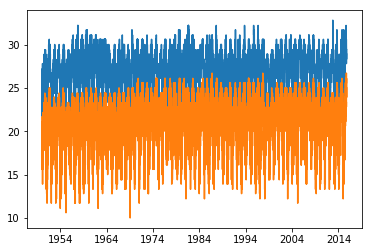

In [66]:
lihue_tmax = getobs('USW00022536.dly', 'TMAX')
lihue_tmin = getobs('USW00022536.dly', 'TMIN')
pp.plot(lihue_tmax['date'],lihue_tmax['value'])
pp.plot(lihue_tmin['date'],lihue_tmin['value'])